In [19]:
# import json
# import os


# # # Define the directory and file name
# # base_dir = "models/llama-3.2-1b/pruned/oneshot/pruned_llama-3.2-1b_tail_2/pruned/partial_tuning_taylor8/llama-3.2-1b_partial_tuning_alpaca-cleaned_last3/models__llama-3.2-1b__pruned__pruned_llama-3.2-1b_tail_2__pruned__partial_tuning_taylor8__llama-3.2-1b_partial_tuning_alpaca-cleaned_last3"
# # file_name = "results_2025-02-04T02-07-46.109961.json"

# # # Construct the absolute path
# # file_path = os.path.join(base_dir, file_name)

# cal_data_list = ["tail", "taylor_gsm8k", "taylor_gsm8k_cot", "taylor_mmlu", "taylor_mmlu_cot", "taylor_truthfulqa", "taylor_truthfulqa_cot"]
# for cal_data in cal_data_list:
#     for num_pruned_layers in [2, 4, 6, 8]:
#         name = f"{cal_data}_{num_pruned_layers}"
#         # List all files in folder_path
#         folder_path = f"models/llama-3.2-1b/pruned/oneshot/pruned_llama-3.2-1b_{name}/pruned/partial_tuning_taylor8/llama-3.2-1b_partial_tuning_alpaca-cleaned_last3/models__llama-3.2-1b__pruned__pruned_llama-3.2-1b_{name}__pruned__partial_tuning_taylor8__llama-3.2-1b_partial_tuning_alpaca-cleaned_last3"
#         all_files = os.listdir(folder_path)

#         # Filter for .json files
#         json_files = [f for f in all_files if f.endswith(".json")]

#         # Check we have exactly one JSON file
#         if len(json_files) == 0:
#             print("No JSON files found in the directory.")
#             raise SystemExit(1)
#         elif len(json_files) > 1:
#             print("Multiple JSON files found in the directory.")
#             print("Please make sure exactly one JSON file is present, or specify the file explicitly.")
#             raise SystemExit(1)

#         # Construct the full file path for the single JSON file
#         json_file_name = json_files[0]
#         file_path = os.path.join(folder_path, json_file_name)

#         # Load the JSON file
#         with open(file_path, "r") as f:
#             data = json.load(f)

#         # Verify that "results" key exists in the JSON
#         if "results" not in data:
#             print('"results" key not found in the JSON.')
#             raise SystemExit(1)

#         results_data = data["results"]

#         # Mapping of "display label" to actual JSON keys (in the desired order)
#         ordered_keys = [
#             ("arc-e",       "arc_easy"),
#             ("arc-c",       "arc_challenge"),
#             ("hellaswag",   "hellaswag"),
#             ("mmlu",        "mmlu"),
#             ("openbookqa",  "openbookqa"),
#             ("piqa",        "piqa"),
#             ("winograd",    "winogrande"),
#         ]

#         # Collect accuracy values in the specified order
#         acc_values = []
#         for display_key, json_key in ordered_keys:
#             if json_key in results_data:
#                 dataset_dict = results_data[json_key]
#                 acc_value = dataset_dict.get("acc,none")
#                 if acc_value is not None:
#                     acc_values.append(f"{acc_value:.4f}")  # Format to 4 decimal places
#                 else:
#                     acc_values.append("None")
#             else:
#                 acc_values.append("None")

#         # Print them on a single line (tab-separated)
#         print("\t".join(acc_values))

In [27]:
# !pip install PrettyTable
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 188.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 139.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 137.7 MB/s eta 0:00:00


In [43]:
import os
import json
from prettytable import PrettyTable

cal_data_list = ["tail", "taylor_gsm8k", "taylor_gsm8k_cot", "taylor_mmlu", "taylor_mmlu_cot", "taylor_truthfulqa", "taylor_truthfulqa_cot"]
results_dict = {}

for cal_data in cal_data_list:
    results_dict[cal_data] = {}
    for num_pruned_layers in [2, 4, 6, 8]:
        name = f"{cal_data}_{num_pruned_layers}"
        folder_path = f"models/llama-3.2-1b/pruned/oneshot/pruned_llama-3.2-1b_{name}/pruned/partial_tuning_taylor8/llama-3.2-1b_partial_tuning_alpaca-cleaned_last3/models__llama-3.2-1b__pruned__pruned_llama-3.2-1b_{name}__pruned__partial_tuning_taylor8__llama-3.2-1b_partial_tuning_alpaca-cleaned_last3"
        all_files = os.listdir(folder_path)

        json_files = [f for f in all_files if f.endswith(".json")]

        if len(json_files) == 0:
            print(f"No JSON files found in the directory for {name}.")
            continue
        elif len(json_files) > 1:
            print(f"Multiple JSON files found in the directory for {name}.")
            continue

        json_file_name = json_files[0]
        file_path = os.path.join(folder_path, json_file_name)

        with open(file_path, "r") as f:
            data = json.load(f)

        if "results" not in data:
            print(f'"results" key not found in the JSON for {name}.')
            continue

        results_data = data["results"]

        ordered_keys = [
            ("arc-e",       "arc_easy"),
            ("arc-c",       "arc_challenge"),
            ("hellaswag",   "hellaswag"),
            ("mmlu",        "mmlu"),
            ("openbookqa",  "openbookqa"),
            ("piqa",        "piqa"),
            ("winograd",    "winogrande"),
        ]

        acc_values = []
        for display_key, json_key in ordered_keys:
            if json_key in results_data:
                dataset_dict = results_data[json_key]
                acc_value = dataset_dict.get("acc,none")
                if acc_value is not None:
                    acc_values.append(f"{acc_value:.4f}")
                else:
                    acc_values.append("None")
            else:
                acc_values.append("None")

        results_dict[cal_data][num_pruned_layers] = acc_values

# Create a table using PrettyTable
table = PrettyTable()
table.field_names = ["Cal Data", "Pruned Layers", "arc-e", "arc-c", "hellaswag", "mmlu", "openbookqa", "piqa", "winograd"]

for cal_data, layer_dict in results_dict.items():
    for num_pruned_layers, acc_values in layer_dict.items():
        table.add_row([cal_data, num_pruned_layers] + acc_values)

# Print the table
print(table)

+-----------------------+---------------+--------+--------+-----------+--------+------------+--------+----------+
|        Cal Data       | Pruned Layers | arc-e  | arc-c  | hellaswag |  mmlu  | openbookqa |  piqa  | winograd |
+-----------------------+---------------+--------+--------+-----------+--------+------------+--------+----------+
|          tail         |       2       | 0.6052 | 0.3097 |   0.4509  | 0.3430 |   0.2520   | 0.7089 |  0.5809  |
|          tail         |       4       | 0.5358 | 0.2730 |   0.4091  | 0.3292 |   0.2320   | 0.6746 |  0.5777  |
|          tail         |       6       | 0.4461 | 0.2585 |   0.3419  | 0.2472 |   0.2040   | 0.6415 |  0.5454  |
|          tail         |       8       | 0.3847 | 0.2133 |   0.2958  | 0.2465 |   0.1780   | 0.6034 |  0.4925  |
|      taylor_gsm8k     |       2       | 0.5901 | 0.2961 |   0.4416  | 0.3065 |   0.2280   | 0.7133 |  0.5998  |
|      taylor_gsm8k     |       4       | 0.2942 | 0.1715 |   0.2705  | 0.2376 |   0.130

In [34]:
# import os
# import json
# import numpy as np
# import matplotlib.pyplot as plt

# # Load your existing code to populate results_dict here...

# # Additional dense data
# dense_data = {
#     "arc-e": 0.6536,
#     "arc-c": 0.3139,
#     "hellaswag": 0.4771,
#     "mmlu": 0.3677,
#     "openbookqa": 0.266,
#     "piqa": 0.7442,
#     "winograd": 0.6045,
# }

# # Add dense data to the results_dict
# for cal_data in cal_data_list:
#     results_dict[cal_data][0] = [
#         dense_data["arc-e"], dense_data["arc-c"], dense_data["hellaswag"],
#         dense_data["mmlu"], dense_data["openbookqa"], dense_data["piqa"],
#         dense_data["winograd"]
#     ]

# pruned_layers = [0, 2, 4, 6, 8]
# sparsity_labels = ["0%", "12.5%", "25%", "37.5%", "50%"]

# reasoning_indices = [0, 1, 2]      # arc-e, arc-c, hellaswag
# non_reasoning_indices = [3, 4, 5, 6]  # mmlu, openbookqa, piqa, winograd

# # Calculate average accuracies
# def compute_average_for_task_type(indices, results_dict, cal_data_list, pruned_layers):
#     averages = {cal_data: [] for cal_data in cal_data_list}
#     for cal_data in cal_data_list:
#         for layer in pruned_layers:
#             task_accuracies = results_dict[cal_data].get(layer, [])
#             if len(task_accuracies) > 0:
#                 avg_accuracy = np.mean([float(task_accuracies[i]) for i in indices])
#             else:
#                 avg_accuracy = 0
#             averages[cal_data].append(avg_accuracy)
#     return averages

# reasoning_averages = compute_average_for_task_type(reasoning_indices, results_dict, cal_data_list, pruned_layers)
# non_reasoning_averages = compute_average_for_task_type(non_reasoning_indices, results_dict, cal_data_list, pruned_layers)

# # Plotting
# def plot_averages(title, averages_dict, sparsity_labels):
#     plt.figure(figsize=(12, 6))
#     for cal_data, averages in averages_dict.items():
#         plt.plot(sparsity_labels, averages, marker='o', label=cal_data)
    
#     plt.title(title)
#     plt.xlabel("Sparsity")
#     plt.ylabel("Average Accuracy")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# plot_averages("Reasoning Tasks Average Accuracy", reasoning_averages, sparsity_labels)
# plot_averages("Non-Reasoning Tasks Average Accuracy", non_reasoning_averages, sparsity_labels)


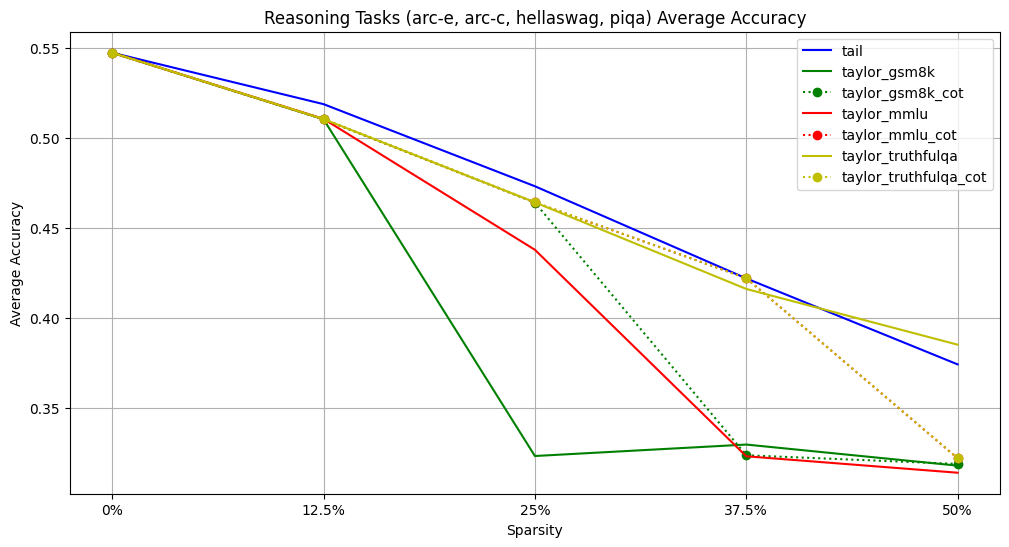

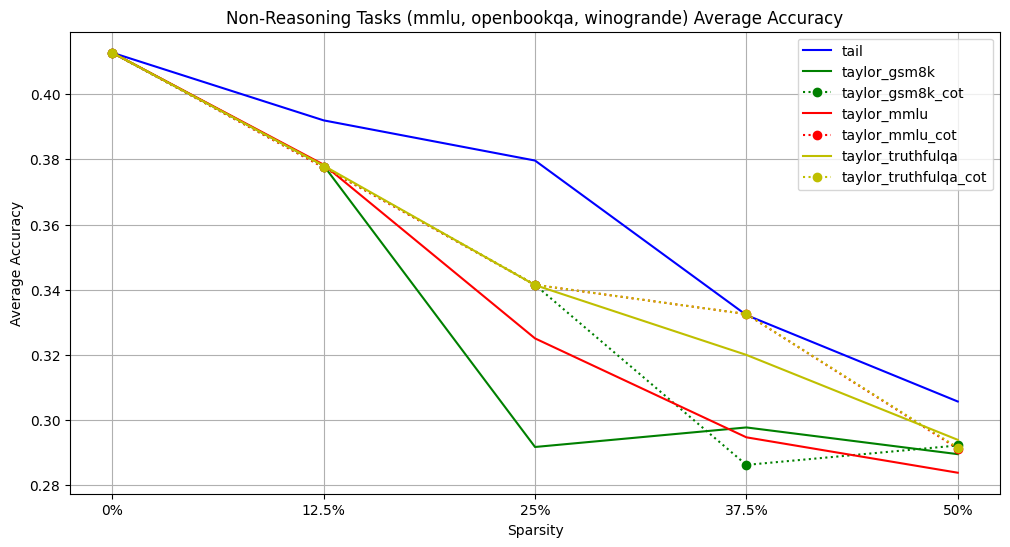

In [44]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Load or construct your existing results_dict here...

# Additional dense data
dense_data = {
    "arc-e": 0.6536,
    "arc-c": 0.3139,
    "hellaswag": 0.4771,
    "mmlu": 0.3677,
    "openbookqa": 0.266,
    "piqa": 0.7442,
    "winograd": 0.6045,
}

# Add dense data to the results_dict
for cal_data in cal_data_list:
    results_dict[cal_data][0] = [
        dense_data["arc-e"], dense_data["arc-c"], dense_data["hellaswag"],
        dense_data["mmlu"], dense_data["openbookqa"], dense_data["piqa"],
        dense_data["winograd"]
    ]

pruned_layers = [0, 2, 4, 6, 8]
sparsity_labels = ["0%", "12.5%", "25%", "37.5%", "50%"]

reasoning_indices = [0, 1, 2, 5]      # arc-e, arc-c, hellaswag, piqa
non_reasoning_indices = [3, 4, 6]  # mmlu, openbookqa,  winograd

# Calculate average accuracies
def compute_average_for_task_type(indices, results_dict, cal_data_list, pruned_layers):
    averages = {cal_data: [] for cal_data in cal_data_list}
    for cal_data in cal_data_list:
        for layer in pruned_layers:
            task_accuracies = results_dict[cal_data].get(layer, [])
            if len(task_accuracies) > 0:
                avg_accuracy = np.mean([float(task_accuracies[i]) for i in indices])
            else:
                avg_accuracy = 0
            averages[cal_data].append(avg_accuracy)
    return averages

reasoning_averages = compute_average_for_task_type(reasoning_indices, results_dict, cal_data_list, pruned_layers)
non_reasoning_averages = compute_average_for_task_type(non_reasoning_indices, results_dict, cal_data_list, pruned_layers)

# Plotting
def plot_averages(title, averages_dict, sparsity_labels):
    plt.figure(figsize=(12, 6))
    
    line_styles = {
        'tail': '-', 'taylor_gsm8k': '-', 'taylor_gsm8k_cot': ':',
        'taylor_mmlu': '-', 'taylor_mmlu_cot': ':',
        'taylor_truthfulqa': '-', 'taylor_truthfulqa_cot': ':'
    }
    
    colors = {
        'tail': 'b', 'taylor_gsm8k': 'g', 'taylor_gsm8k_cot': 'g',
        'taylor_mmlu': 'r', 'taylor_mmlu_cot': 'r',
        'taylor_truthfulqa': 'y', 'taylor_truthfulqa_cot': 'y'  # Changed to dark yellow
    }
    
    for cal_data, averages in averages_dict.items():
        # Only add markers for dotted lines
        marker = 'o' if 'cot' in cal_data else None
        plt.plot(sparsity_labels, averages, marker=marker, label=cal_data,
                 linestyle=line_styles[cal_data], color=colors[cal_data])
    
    plt.title(title)
    plt.xlabel("Sparsity")
    plt.ylabel("Average Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_averages("Reasoning Tasks (arc-e, arc-c, hellaswag, piqa) Average Accuracy", reasoning_averages, sparsity_labels)
plot_averages("Non-Reasoning Tasks (mmlu, openbookqa, winogrande) Average Accuracy", non_reasoning_averages, sparsity_labels)

In [32]:
import os
import json
from prettytable import PrettyTable

cal_data_list = ["tail", "taylor_gsm8k", "taylor_gsm8k_cot", "taylor_mmlu", "taylor_mmlu_cot", "taylor_truthfulqa", "taylor_truthfulqa_cot"]
results_dict = {}

for cal_data in cal_data_list:
    results_dict[cal_data] = {}
    for num_pruned_layers in [2, 4, 6, 8]:
        name = f"{cal_data}_{num_pruned_layers}"
        folder_path = f"models/llama-3.2-1b/pruned/oneshot/pruned_llama-3.2-1b_{name}/pruned/partial_tuning_taylor8/llama-3.2-1b_partial_tuning_alpaca-cleaned_last3/5_shot/models__llama-3.2-1b__pruned__pruned_llama-3.2-1b_{name}__pruned__partial_tuning_taylor8__llama-3.2-1b_partial_tuning_alpaca-cleaned_last3"
        all_files = os.listdir(folder_path)

        json_files = [f for f in all_files if f.endswith(".json")]

        if len(json_files) == 0:
            print(f"No JSON files found in the directory for {name}.")
            continue
        elif len(json_files) > 1:
            print(f"Multiple JSON files found in the directory for {name}.")
            continue

        json_file_name = json_files[0]
        file_path = os.path.join(folder_path, json_file_name)

        with open(file_path, "r") as f:
            data = json.load(f)

        if "results" not in data:
            print(f'"results" key not found in the JSON for {name}.')
            continue

        results_data = data["results"]

        ordered_keys = [
            ("arc-e",       "arc_easy"),
            ("arc-c",       "arc_challenge"),
            ("hellaswag",   "hellaswag"),
            ("mmlu",        "mmlu"),
            ("openbookqa",  "openbookqa"),
            ("piqa",        "piqa"),
            ("winograd",    "winogrande"),
        ]

        acc_values = []
        for display_key, json_key in ordered_keys:
            if json_key in results_data:
                dataset_dict = results_data[json_key]
                acc_value = dataset_dict.get("acc,none")
                if acc_value is not None:
                    acc_values.append(f"{acc_value:.4f}")
                else:
                    acc_values.append("None")
            else:
                acc_values.append("None")

        results_dict[cal_data][num_pruned_layers] = acc_values

# Create a table using PrettyTable
table = PrettyTable()
table.field_names = ["Cal Data", "Pruned Layers", "arc-e", "arc-c", "hellaswag", "mmlu", "openbookqa", "piqa", "winograd"]

for cal_data, layer_dict in results_dict.items():
    for num_pruned_layers, acc_values in layer_dict.items():
        table.add_row([cal_data, num_pruned_layers] + acc_values)

# Print the table
print(table)

+-----------------------+---------------+--------+--------+-----------+--------+------------+--------+----------+
|        Cal Data       | Pruned Layers | arc-e  | arc-c  | hellaswag |  mmlu  | openbookqa |  piqa  | winograd |
+-----------------------+---------------+--------+--------+-----------+--------+------------+--------+----------+
|          tail         |       2       | 0.6431 | 0.3328 |   0.4480  | 0.2866 |   0.2800   | 0.7209 |  0.6006  |
|          tail         |       4       | 0.5715 | 0.3097 |   0.4023  | 0.2865 |   0.2500   | 0.6828 |  0.6030  |
|          tail         |       6       | 0.4895 | 0.2713 |   0.3401  | 0.2468 |   0.2140   | 0.6349 |  0.5651  |
|          tail         |       8       | 0.4150 | 0.2082 |   0.2932  | 0.2458 |   0.1500   | 0.5941 |  0.5012  |
|      taylor_gsm8k     |       2       | 0.6368 | 0.3208 |   0.4438  | 0.2751 |   0.2600   | 0.7220 |  0.6117  |
|      taylor_gsm8k     |       4       | 0.3005 | 0.1809 |   0.2727  | 0.2599 |   0.138

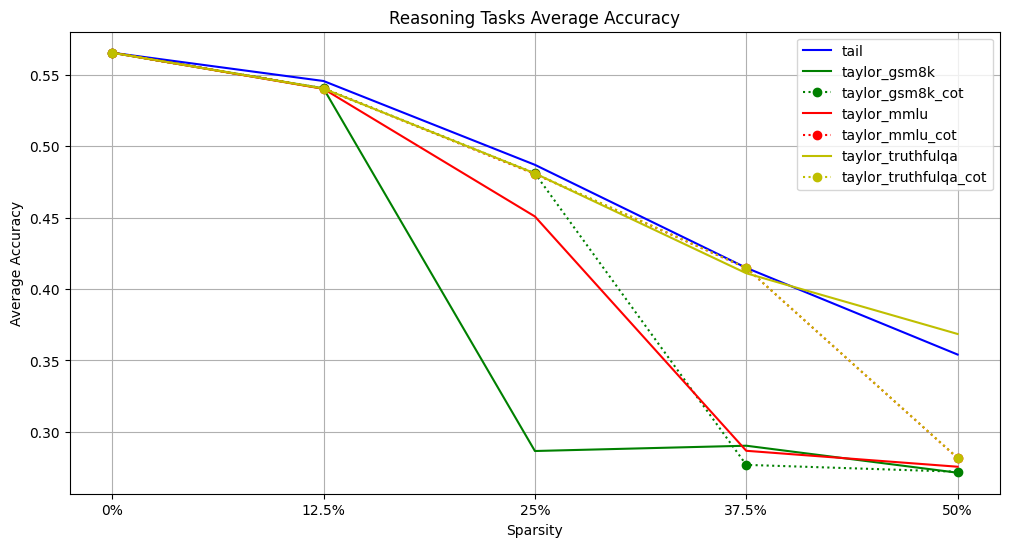

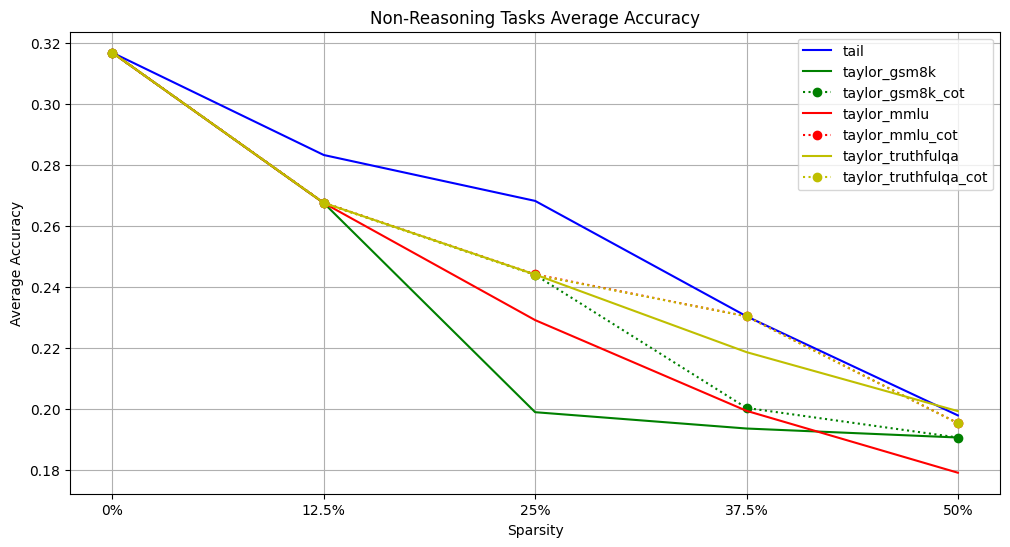

In [36]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Load or construct your existing results_dict here...

# Additional dense data
dense_data = {
    "arc-e": 0.6536,
    "arc-c": 0.3139,
    "hellaswag": 0.4771,
    "mmlu": 0.3677,
    "openbookqa": 0.266,
    "piqa": 0.7442,
    "winograd": 0.6045,
}

# Add dense data to the results_dict
for cal_data in cal_data_list:
    results_dict[cal_data][0] = [
        dense_data["arc-e"], dense_data["arc-c"], dense_data["hellaswag"],
        dense_data["mmlu"], dense_data["openbookqa"], dense_data["piqa"],
        dense_data["winograd"]
    ]

pruned_layers = [0, 2, 4, 6, 8]
sparsity_labels = ["0%", "12.5%", "25%", "37.5%", "50%"]

reasoning_indices = [0, 2]#, 1, 2]      # arc-e, arc-c, hellaswag
non_reasoning_indices = [3, 4]#, 4, 5, 6]  # mmlu, openbookqa, piqa, winograd

# Calculate average accuracies
def compute_average_for_task_type(indices, results_dict, cal_data_list, pruned_layers):
    averages = {cal_data: [] for cal_data in cal_data_list}
    for cal_data in cal_data_list:
        for layer in pruned_layers:
            task_accuracies = results_dict[cal_data].get(layer, [])
            if len(task_accuracies) > 0:
                avg_accuracy = np.mean([float(task_accuracies[i]) for i in indices])
            else:
                avg_accuracy = 0
            averages[cal_data].append(avg_accuracy)
    return averages

reasoning_averages = compute_average_for_task_type(reasoning_indices, results_dict, cal_data_list, pruned_layers)
non_reasoning_averages = compute_average_for_task_type(non_reasoning_indices, results_dict, cal_data_list, pruned_layers)

# Plotting
def plot_averages(title, averages_dict, sparsity_labels):
    plt.figure(figsize=(12, 6))
    
    line_styles = {
        'tail': '-', 'taylor_gsm8k': '-', 'taylor_gsm8k_cot': ':',
        'taylor_mmlu': '-', 'taylor_mmlu_cot': ':',
        'taylor_truthfulqa': '-', 'taylor_truthfulqa_cot': ':'
    }
    
    colors = {
        'tail': 'b', 'taylor_gsm8k': 'g', 'taylor_gsm8k_cot': 'g',
        'taylor_mmlu': 'r', 'taylor_mmlu_cot': 'r',
        'taylor_truthfulqa': 'y', 'taylor_truthfulqa_cot': 'y'  # Changed to dark yellow
    }
    
    for cal_data, averages in averages_dict.items():
        # Only add markers for dotted lines
        marker = 'o' if 'cot' in cal_data else None
        plt.plot(sparsity_labels, averages, marker=marker, label=cal_data,
                 linestyle=line_styles[cal_data], color=colors[cal_data])
    
    plt.title(title)
    plt.xlabel("Sparsity")
    plt.ylabel("Average Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_averages("Reasoning Tasks Average Accuracy", reasoning_averages, sparsity_labels)
plot_averages("Non-Reasoning Tasks Average Accuracy", non_reasoning_averages, sparsity_labels)

In [37]:
import os
import json
from prettytable import PrettyTable

cal_data_list = ["tail", "taylor_gsm8k", "taylor_gsm8k_cot", "taylor_mmlu", "taylor_mmlu_cot", "taylor_truthfulqa", "taylor_truthfulqa_cot"]
results_dict = {}

for cal_data in cal_data_list:
    results_dict[cal_data] = {}
    for num_pruned_layers in [2, 4, 6, 8]:
        name = f"{cal_data}_{num_pruned_layers}"
        folder_path = f"models/llama-3.2-1b/pruned/oneshot/pruned_llama-3.2-1b_{name}/5_shot/models__llama-3.2-1b__pruned__pruned_llama-3.2-1b_{name}"
        all_files = os.listdir(folder_path)

        json_files = [f for f in all_files if f.endswith(".json")]

        if len(json_files) == 0:
            print(f"No JSON files found in the directory for {name}.")
            continue
        elif len(json_files) > 1:
            print(f"Multiple JSON files found in the directory for {name}.")
            continue

        json_file_name = json_files[0]
        file_path = os.path.join(folder_path, json_file_name)

        with open(file_path, "r") as f:
            data = json.load(f)

        if "results" not in data:
            print(f'"results" key not found in the JSON for {name}.')
            continue

        results_data = data["results"]

        ordered_keys = [
            ("arc-e",       "arc_easy"),
            ("arc-c",       "arc_challenge"),
            ("hellaswag",   "hellaswag"),
            ("mmlu",        "mmlu"),
            ("openbookqa",  "openbookqa"),
            ("piqa",        "piqa"),
            ("winograd",    "winogrande"),
        ]

        acc_values = []
        for display_key, json_key in ordered_keys:
            if json_key in results_data:
                dataset_dict = results_data[json_key]
                acc_value = dataset_dict.get("acc,none")
                if acc_value is not None:
                    acc_values.append(f"{acc_value:.4f}")
                else:
                    acc_values.append("None")
            else:
                acc_values.append("None")

        results_dict[cal_data][num_pruned_layers] = acc_values

# Create a table using PrettyTable
table = PrettyTable()
table.field_names = ["Cal Data", "Pruned Layers", "arc-e", "arc-c", "hellaswag", "mmlu", "openbookqa", "piqa", "winograd"]

for cal_data, layer_dict in results_dict.items():
    for num_pruned_layers, acc_values in layer_dict.items():
        table.add_row([cal_data, num_pruned_layers] + acc_values)

# Print the table
print(table)

+-----------------------+---------------+--------+--------+-----------+--------+------------+--------+----------+
|        Cal Data       | Pruned Layers | arc-e  | arc-c  | hellaswag |  mmlu  | openbookqa |  piqa  | winograd |
+-----------------------+---------------+--------+--------+-----------+--------+------------+--------+----------+
|          tail         |       2       | 0.5471 | 0.3123 |   0.4129  | 0.2547 |   0.2860   | 0.6850 |  0.5943  |
|          tail         |       4       | 0.4646 | 0.2969 |   0.3376  | 0.2473 |   0.2660   | 0.6480 |  0.5730  |
|          tail         |       6       | 0.3519 | 0.2654 |   0.2909  | 0.2449 |   0.2140   | 0.6121 |  0.5635  |
|          tail         |       8       | 0.2769 | 0.2363 |   0.2672  | 0.2568 |   0.1740   | 0.5767 |  0.5170  |
|      taylor_gsm8k     |       2       | 0.4423 | 0.2816 |   0.3500  | 0.2431 |   0.2560   | 0.6485 |  0.5904  |
|      taylor_gsm8k     |       4       | 0.2500 | 0.2039 |   0.2579  | 0.2437 |   0.148

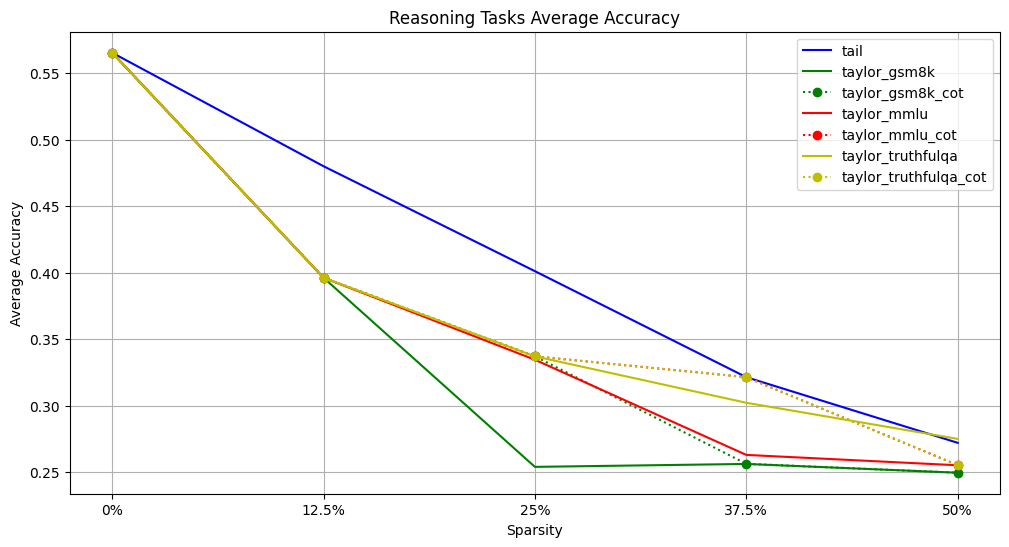

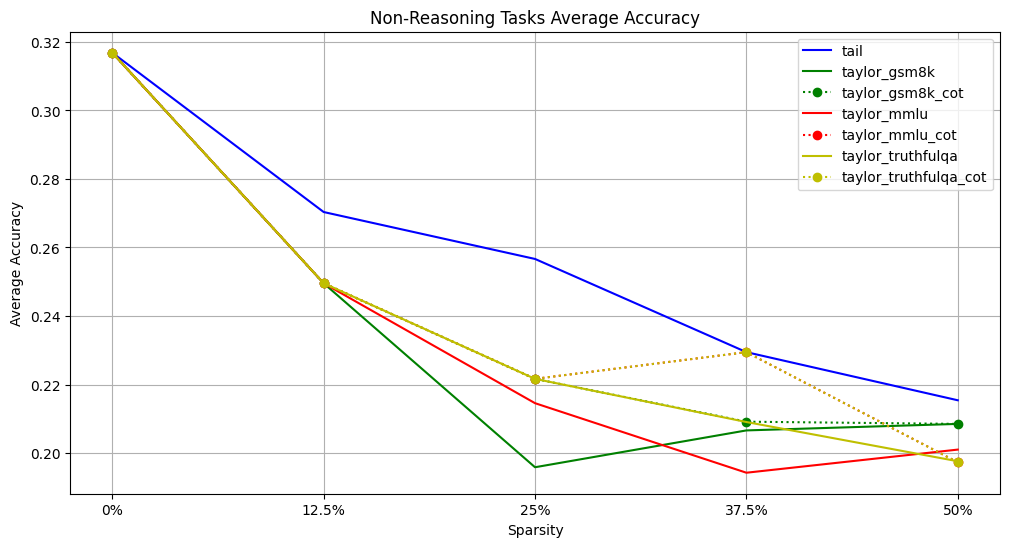

In [38]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Load or construct your existing results_dict here...

# Additional dense data
dense_data = {
    "arc-e": 0.6536,
    "arc-c": 0.3139,
    "hellaswag": 0.4771,
    "mmlu": 0.3677,
    "openbookqa": 0.266,
    "piqa": 0.7442,
    "winograd": 0.6045,
}

# Add dense data to the results_dict
for cal_data in cal_data_list:
    results_dict[cal_data][0] = [
        dense_data["arc-e"], dense_data["arc-c"], dense_data["hellaswag"],
        dense_data["mmlu"], dense_data["openbookqa"], dense_data["piqa"],
        dense_data["winograd"]
    ]

pruned_layers = [0, 2, 4, 6, 8]
sparsity_labels = ["0%", "12.5%", "25%", "37.5%", "50%"]

reasoning_indices = [0, 2]#, 1, 2]      # arc-e, arc-c, hellaswag
non_reasoning_indices = [3, 4]#, 4, 5, 6]  # mmlu, openbookqa, piqa, winograd

# Calculate average accuracies
def compute_average_for_task_type(indices, results_dict, cal_data_list, pruned_layers):
    averages = {cal_data: [] for cal_data in cal_data_list}
    for cal_data in cal_data_list:
        for layer in pruned_layers:
            task_accuracies = results_dict[cal_data].get(layer, [])
            if len(task_accuracies) > 0:
                avg_accuracy = np.mean([float(task_accuracies[i]) for i in indices])
            else:
                avg_accuracy = 0
            averages[cal_data].append(avg_accuracy)
    return averages

reasoning_averages = compute_average_for_task_type(reasoning_indices, results_dict, cal_data_list, pruned_layers)
non_reasoning_averages = compute_average_for_task_type(non_reasoning_indices, results_dict, cal_data_list, pruned_layers)

# Plotting
def plot_averages(title, averages_dict, sparsity_labels):
    plt.figure(figsize=(12, 6))
    
    line_styles = {
        'tail': '-', 'taylor_gsm8k': '-', 'taylor_gsm8k_cot': ':',
        'taylor_mmlu': '-', 'taylor_mmlu_cot': ':',
        'taylor_truthfulqa': '-', 'taylor_truthfulqa_cot': ':'
    }
    
    colors = {
        'tail': 'b', 'taylor_gsm8k': 'g', 'taylor_gsm8k_cot': 'g',
        'taylor_mmlu': 'r', 'taylor_mmlu_cot': 'r',
        'taylor_truthfulqa': 'y', 'taylor_truthfulqa_cot': 'y'  # Changed to dark yellow
    }
    
    for cal_data, averages in averages_dict.items():
        # Only add markers for dotted lines
        marker = 'o' if 'cot' in cal_data else None
        plt.plot(sparsity_labels, averages, marker=marker, label=cal_data,
                 linestyle=line_styles[cal_data], color=colors[cal_data])
    
    plt.title(title)
    plt.xlabel("Sparsity")
    plt.ylabel("Average Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_averages("Reasoning Tasks Average Accuracy", reasoning_averages, sparsity_labels)
plot_averages("Non-Reasoning Tasks Average Accuracy", non_reasoning_averages, sparsity_labels)